In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/DL Projects/Auto-encoder CNN/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/DL Projects/Auto-encoder CNN/test.csv')

In [0]:
train_X = train.drop(labels = 'label', axis = 1)

In [0]:
train_X = train_X.values
test_X = test.values

In [0]:
train_X = train_X / 255.0
test_X = test_X / 255.0

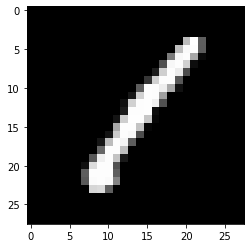

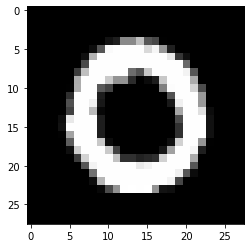

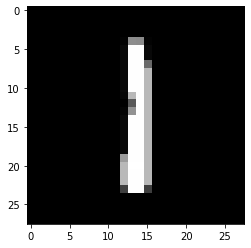

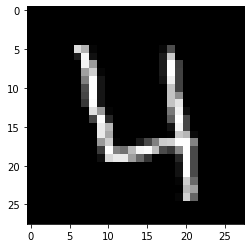

In [7]:
for i,_ in enumerate(train_X[:4]):
    plt.imshow(train_X[i].reshape((28,28)))
    plt.gray()
    plt.show()

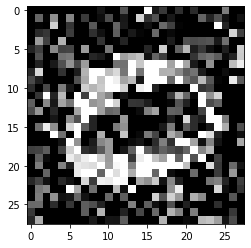

In [8]:
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html

noise_factor = 0.5
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape) 
x_test_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [0]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [0]:
x_test_noisy = x_test_noisy.reshape(-1,28,28,1)
x_train_noisy = x_train_noisy.reshape(-1,28,28,1)

In [0]:
from tensorflow.keras.layers import  Input, Dense, MaxPooling2D, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

In [0]:
input_img = Input(shape=(28, 28, 1,))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [0]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [14]:
x_test_noisy.shape

(28000, 28, 28, 1)

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, train_X,
                epochs=200,
                batch_size=64,
                validation_data=(x_test_noisy, test_X))

Epoch 1/200
657/657 [==============================] - 4s 6ms/step - loss: 0.7295 - val_loss: 0.7032
Epoch 2/200
657/657 [==============================] - 4s 5ms/step - loss: 0.6705 - val_loss: 0.6238
Epoch 3/200
657/657 [==============================] - 4s 5ms/step - loss: 0.5512 - val_loss: 0.5064
Epoch 4/200
657/657 [==============================] - 4s 5ms/step - loss: 0.4987 - val_loss: 0.4922
Epoch 5/200
657/657 [==============================] - 4s 5ms/step - loss: 0.4870 - val_loss: 0.4807
Epoch 6/200
657/657 [==============================] - 4s 6ms/step - loss: 0.4748 - val_loss: 0.4682
Epoch 7/200
657/657 [==============================] - 4s 5ms/step - loss: 0.4617 - val_loss: 0.4542
Epoch 8/200
657/657 [==============================] - 4s 5ms/step - loss: 0.4466 - val_loss: 0.4379
Epoch 9/200
657/657 [==============================] - 4s 6ms/step - loss: 0.4287 - val_loss: 0.4181
Epoch 10/200
657/657 [==============================] - 4s 6ms/step - loss: 0.4063 - val_lo

In [0]:
autoencoder.save('autoencoder-image-de_noising.h5')

In [0]:
preds = autoencoder.predict(x_train_noisy)

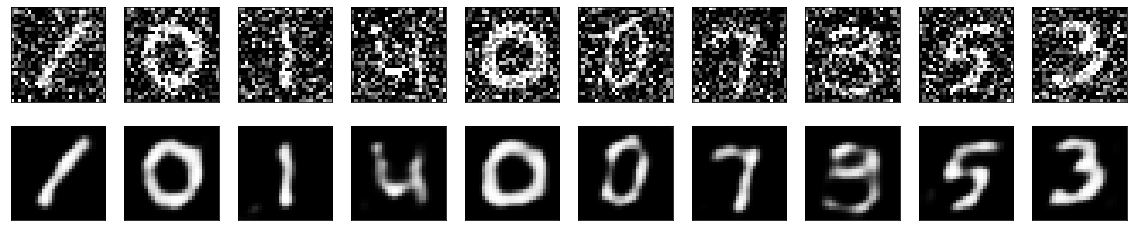

In [18]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(preds[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()